<Diabetes Disease> 

# Diabetes Disease

# 1. DATA PROCESSING

## Importing Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read the data

In [5]:
data = pd.read_csv("diabetes.csv")

## View the data

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Print top 5 records

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Print bottom 5 records

In [8]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## To check how many rows and columns

- Dataset comprises 768 observations(rows) and 9 features(columns).
- Out of the 9, one is the target variable and rest 8 are input variables.

In [9]:
data.shape

(768, 9)

## To print column names

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## To check the datatypes of attributes

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Reading specific rows

In [12]:
data[1:31]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0


## To read specific rows with particular columns

In [13]:
data[1:21]["Pregnancies"]

1      1
2      8
3      1
4      0
5      5
6      3
7     10
8      2
9      8
10     4
11    10
12    10
13     1
14     5
15     7
16     0
17     7
18     1
19     1
20     3
Name: Pregnancies, dtype: int64

## Reading specific rows and columns

In [14]:
data.loc[[100,200,300,400,500,600,700],["BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]]

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
100,72,0,0,39.0,1.222
200,80,16,0,31.0,0.874
300,0,0,0,32.3,0.839
400,64,0,0,32.0,0.161
500,90,19,71,25.2,0.313
600,88,19,0,27.1,0.400
700,76,27,200,35.9,0.483


## Information of dataset

- Dataset has 2 Float columns, 7 integer columns
- Dataset also have no missing values ie all columns have 768 observations

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## To print statistical information

- Most of the attributes(predictors) has a large difference between 75th %tile and max values. 
- Thus, the observation suggest that there are extreme values i.e Outliers in our dataset.
- The Insulin attribute has a large diffrence in mean and median values, seems to have many outliers.

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Overall count for dataset

In [17]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

## Print sample records of dataset

In [18]:
data.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
590,11,111,84,40,0,46.8,0.925,45,1


In [19]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
380,1,107,72,30,82,30.8,0.821,24,0
720,4,83,86,19,0,29.3,0.317,34,0
522,6,114,0,0,0,0.0,0.189,26,0
39,4,111,72,47,207,37.1,1.390,56,1
241,4,91,70,32,88,33.1,0.446,22,0


## nunique(): number of unique values

In [20]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Correlation()

In [21]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Co-varience()

In [22]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


## Count by using particular column names

In [23]:
data["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [24]:
data["Glucose"].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [25]:
data["BMI"].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [26]:
data["DiabetesPedigreeFunction"].value_counts()

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [27]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Checking the unique values in each columns

In [28]:
data["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [29]:
data["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [30]:
data["BMI"].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [31]:
data["DiabetesPedigreeFunction"].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [32]:
data["Outcome"].unique()

array([1, 0], dtype=int64)

# 2. DATA CLEANING

## To check is there any missing values

In [33]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [34]:
data.notnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True,True,True


## Using isnull().any()

In [35]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Using isnull().sum()

In [36]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Using isnull.any().sum()

In [37]:
data.isnull().any().sum()

0

## To check is there any duplicated value

In [38]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [39]:
data.duplicated().sum()

0

In [40]:
data.duplicated().count()

768

## Droping the duplicates

In [67]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Fillna values

In [68]:
data.fillna(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Frame methods

In [69]:
# slicing of row by using iloc[]:

data.iloc[150:250]  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
150,1,136,74,50,204,37.4,0.399,24,0
151,4,114,65,0,0,21.9,0.432,37,0
152,9,156,86,28,155,34.3,1.189,42,1
153,1,153,82,42,485,40.6,0.687,23,0
154,8,188,78,0,0,47.9,0.137,43,1
...,...,...,...,...,...,...,...,...,...
245,9,184,85,15,0,30.0,1.213,49,1
246,10,122,68,0,0,31.2,0.258,41,0
247,0,165,90,33,680,52.3,0.427,23,0
248,9,124,70,33,402,35.4,0.282,34,0


## Sorting by columns in descending order

In [70]:
data.sort_values(ascending=False, by=["BloodPressure"])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0
691,13,158,114,0,0,42.3,0.257,44,1
43,9,171,110,24,240,45.4,0.721,54,1
549,4,189,110,31,0,28.5,0.680,37,0
177,0,129,110,46,130,67.1,0.319,26,1
...,...,...,...,...,...,...,...,...,...
604,4,183,0,0,0,28.4,0.212,36,1
522,6,114,0,0,0,0.0,0.189,26,0
49,7,105,0,0,0,0.0,0.305,24,0
300,0,167,0,0,0,32.3,0.839,30,1


## Sorting the data columns in ascending order

In [71]:
data.sort_values(ascending=True, by=["BMI"])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
145,0,102,75,23,0,0.0,0.572,21,0
706,10,115,0,0,0,0.0,0.261,30,1
522,6,114,0,0,0,0.0,0.189,26,0
49,7,105,0,0,0,0.0,0.305,24,0
371,0,118,64,23,89,0.0,1.731,21,0
...,...,...,...,...,...,...,...,...,...
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
673,3,123,100,35,240,57.3,0.880,22,0
445,0,180,78,63,14,59.4,2.420,25,1


## Describe transpose

In [72]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [73]:
data[data['Glucose']!=0]
data[data['BloodPressure']!=0]
data[data['BMI']!=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Checking the corr of the outcome with other features

In [75]:
data.corr()["Outcome"].sort_values()[:-1]

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Name: Outcome, dtype: float64

# 3. Exploratory Data Analysis

## Countplot on the outcome

 - We have unbalanced dataset 

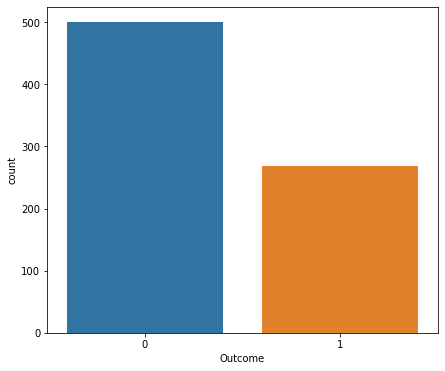

In [76]:
plt.figure(figsize=(7,6))
sns.countplot(data=data,x="Outcome") 
plt.show()

## ScatterPlot on glucose and BMI

- We notice that most of patients who have diabetes has a high level of Glucose

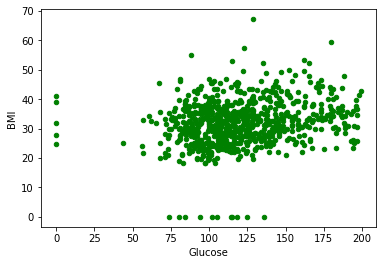

In [77]:
data.plot.scatter(x="Glucose", y="BMI",color="green")
plt.show()

In [53]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [78]:
px.scatter(data,x="Glucose",y="BMI",color="Outcome")

## ScatterPlot on glucose and Age

In [79]:
px.scatter(data,x="Glucose",y="Age",color="Outcome")

## Scatter Plot on DiabetesPedigreeFunction and Age

In [80]:
px.scatter(data,x="DiabetesPedigreeFunction",y="Age")

## BoxPlot

- We notice that the patients with diabetes are older

In [81]:
px.box(data,x="Outcome",y="Age",height=700)

## Boxplot for Pregnancies and the outcome

In [82]:
px.box(data,x="Outcome",y="Pregnancies")

## Histogram plot observation

- Outcome is Binary Categorical.
- Age, DiabetesPedigreeFunction, Insulin, Pregnancies, SkinThickness is positevely skewed ie, shifted towards left
- Glucose, BMI, BloodPreasure seems to be normally distributed

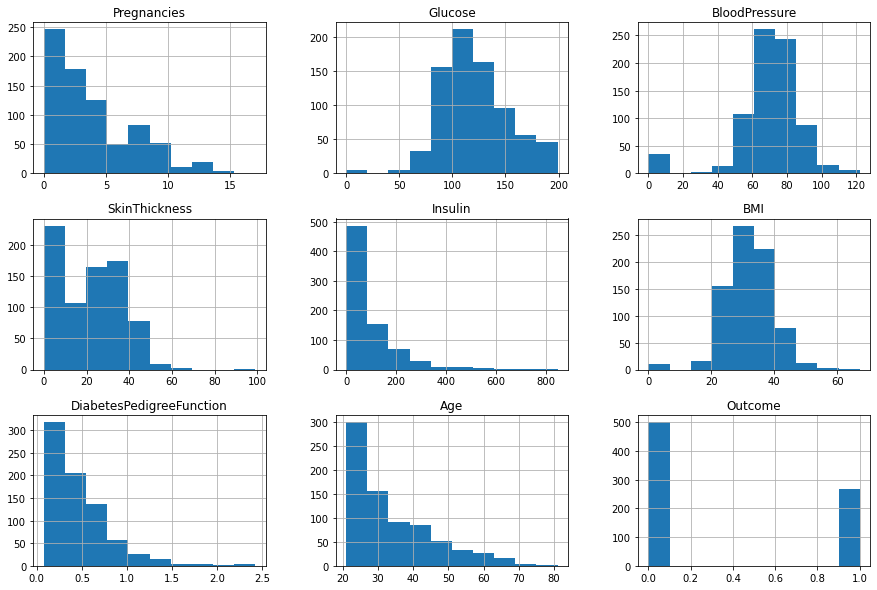

In [83]:
data.hist(figsize=(15,10))
plt.show()

## Correlation matrix observation

- Pregnancies and Age has moderate positive correlation
- Glucose and Outcome also has moderate positive correlation
- Rest other columns have low positive and negative correlation with each other.

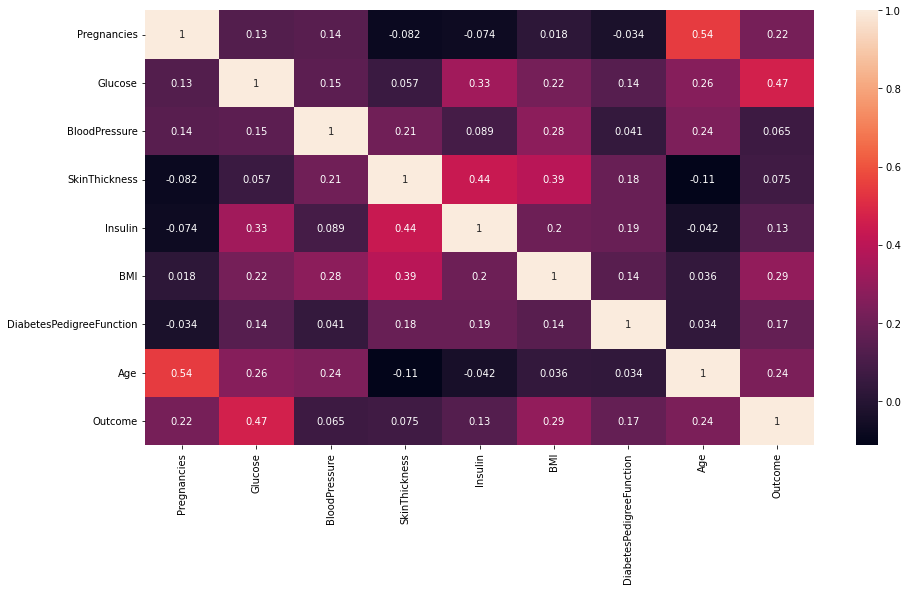

In [84]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [85]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Pie plot observation

- 35% of the persons in dataset have Diabetes and 65% do not have Diabetes
- Data is partially balanced.

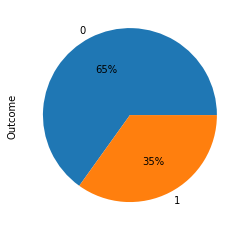

In [86]:
data['Outcome'].value_counts().plot(kind='pie', autopct = "%1.0f%%")
plt.show()

## Pairplot

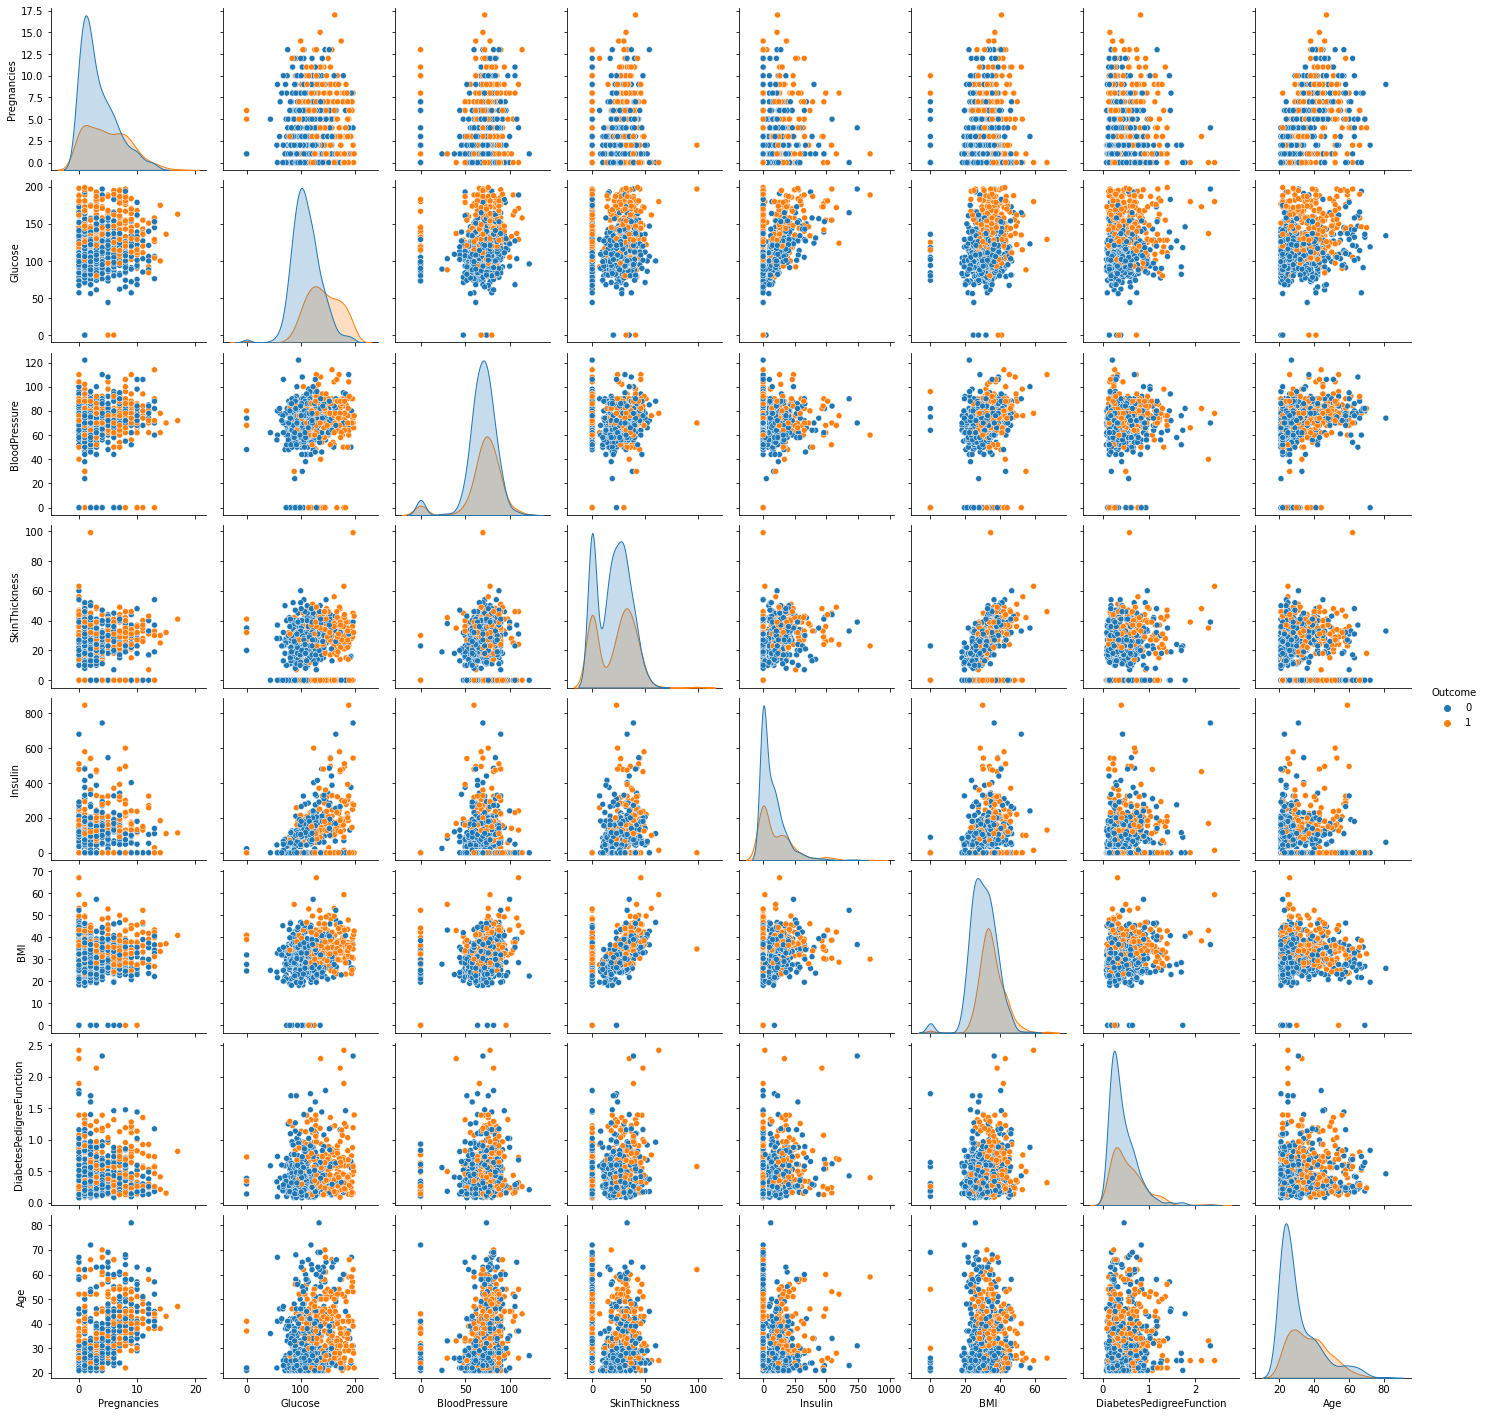

In [91]:
sns.pairplot(data, hue='Outcome')
plt.show()

## Let's Observe some relationship between outcome and ther variables

In [88]:
pd.crosstab(data.Outcome , data.Pregnancies)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


## Pointplot Observation

- Higher the pregnancies , more the chances of getting Diabetes ( pregnancies =14 or 15 or 17, Outcome is 1 )

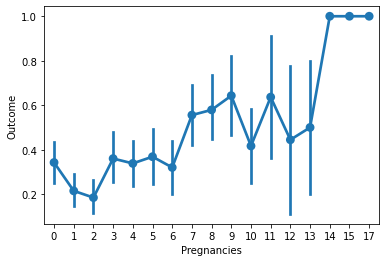

In [90]:
sns.pointplot(data["Pregnancies"], data["Outcome"])
plt.show()

# 4. Machine Learning

## Spliting data into X(independent features) and y( dependent feature)

In [101]:
x = data.drop(["Outcome"], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [102]:
y = data.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc = StandardScaler()
sc

StandardScaler()

In [105]:
sc_input = sc.fit_transform(x)
sc_input

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [106]:
data_input = pd.DataFrame(sc_input, columns= data.columns[:-1])
data_input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


## Split into test and train set (70-30 ratio)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(data_input, y, test_size=0.30, random_state=42)

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [111]:
print("Dataset shape:", data.shape)
print("Input Features shape: ", x_train.shape, y_train.shape)
print("Output Features shape: ", x_test.shape, y_test.shape)

Dataset shape: (768, 9)
Input Features shape:  (537, 8) (537,)
Output Features shape:  (231, 8) (231,)


# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
log = LogisticRegression()
log

LogisticRegression()

In [114]:
# Fitting model
log.fit(x_train, y_train)

LogisticRegression()

In [115]:
# Predicting values
log_pred = log.predict(x_test)
log_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## Accuracy , Confusion Matrix and Classification Report

In [118]:
print("Accuracy Score:")
print(accuracy_score(y_test, log_pred))

Accuracy Score:
0.7359307359307359


In [119]:
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, log_pred))


Confusion Matrix: 
[[120  31]
 [ 30  50]]


In [120]:
print("\nClassification Report: ")
print(classification_report(y_test, log_pred))


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Random Forest

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [125]:
# Train model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
# Prediction on Test set
rf_pred = rf.predict(X_test)
rf_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## Accuracy , Confusion Matrix and Classification Report

In [127]:
print("Accuracy Score:")
print(accuracy_score(y_test, rf_pred))

Accuracy Score:
0.7532467532467533


In [169]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rf_pred))

Confusion Matrix: 
[[121  30]
 [ 27  53]]


In [170]:
print("Classification Report: ")
print(classification_report(y_test, rf_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



## Important Features taken to train Model

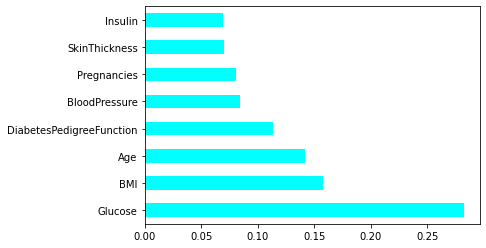

In [131]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(9).plot(kind="barh",color = "cyan")
plt.show()

## Randomized SearchCv

- To find Best Optimal parameter for model

In [132]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
rf2 = RandomForestClassifier(random_state=42)
rf2

RandomForestClassifier(random_state=42)

In [135]:
grid = {"n_estimators" : [10, 20, 50, 100, 250],"max_depth" : [2,3,5,7,None],"max_features" : [2,3,4,5]}

random_cv = RandomizedSearchCV(estimator=rf2, param_distributions= grid,cv=5, n_iter=50,scoring="accuracy",
                              n_jobs=-1, verbose=5, return_train_score=True, random_state=42)

# Fiitng Model 
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7, None],
                                        'max_features': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 50, 100, 250]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=5)

## Best parametes selected by Model

In [136]:
random_cv.best_params_

{'n_estimators': 100, 'max_features': 2, 'max_depth': None}

## Best Accuracy score

In [138]:
random_cv.best_score_

0.7746278989269644

# K-Nearest Neighbors

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn

KNeighborsClassifier(n_neighbors=1)

## Training model and Predicting on Test set

In [143]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [144]:
pred = knn.predict(x_test)
pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## Accuracy , Confusion Matrix and Classification Report

In [145]:
print("Accuracy Score:")
print(accuracy_score(y_test, pred))

Accuracy Score:
0.6233766233766234


In [168]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred))

Confusion Matrix: 
[[108  43]
 [ 44  36]]


In [167]:
print("Classification Report: ")
print(classification_report(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       151
           1       0.46      0.45      0.45        80

    accuracy                           0.62       231
   macro avg       0.58      0.58      0.58       231
weighted avg       0.62      0.62      0.62       231



# Visually Analysing the Error rate with K values

In [148]:
error_rate = [ ]
for i in range(1,50):
    k = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(k, data_input , data["Outcome"], cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'ERROR RATE')

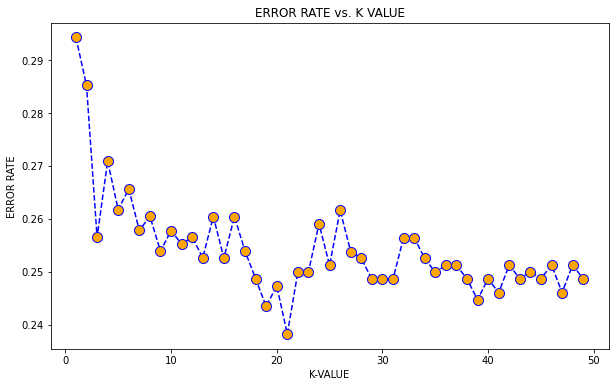

In [151]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="orange", markersize=10)
plt.title("ERROR RATE vs. K VALUE")
plt.xlabel("K-VALUE")
plt.ylabel("ERROR RATE")

## Visually Analysing the Accuracy Score with K values

- As at K=21, we have maximum accuracy and least error rate.

In [154]:
acc = [ ]
for i in range(1,50):
    k = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(k, data_input , data["Outcome"], cv=10)
    acc.append(score.mean())

Text(0, 0.5, 'ACCURACY SCORE')

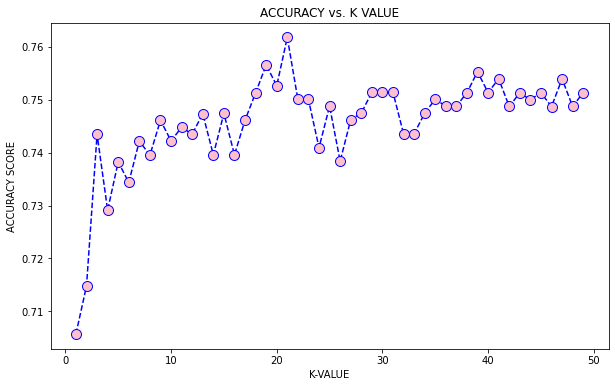

In [156]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), acc, color="blue", linestyle="dashed", marker="o", markerfacecolor="pink", markersize=10)
plt.title('ACCURACY vs. K VALUE')
plt.xlabel('K-VALUE')
plt.ylabel('ACCURACY SCORE')

In [157]:
# Solving with K = 21
knn = KNeighborsClassifier(n_neighbors=21)
knn

KNeighborsClassifier(n_neighbors=21)

In [158]:
# Training model and Predicting on Test set
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [159]:
ypred = knn.predict(x_test)
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Accuracy , Confusion Matrix and Classification Report

In [164]:
print('WITH K=21')
print("Accuracy Score:")
print(accuracy_score(y_test, ypred))

WITH K=21
Accuracy Score:
0.7532467532467533


In [165]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, ypred))

Confusion Matrix: 
[[132  19]
 [ 38  42]]


In [166]:
print("Classification Report: ")
print(classification_report(y_test, ypred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.53      0.60        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



# Machine Learning

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [57]:
# getting X and Y 
x = data1.drop("Outcome",axis=1)
y = data1["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# logistic regression and Confusion matrix

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
model = LogisticRegression()

In [61]:
model

LogisticRegression()

In [62]:
model.fit(x_train,y_train)

LogisticRegression()

In [63]:
pred = model.predict(x_test)
pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [64]:
print(classification_report(y_test,pred)) # logistic Regression didnt work well

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       142
           1       0.69      0.55      0.61        76

    accuracy                           0.76       218
   macro avg       0.74      0.71      0.72       218
weighted avg       0.75      0.76      0.75       218



# lets try again without the BloodPressure and SkinThickness

In [69]:
data1.corr()["Outcome"].sort_values()

SkinThickness               0.092030
Insulin                     0.145488
BloodPressure               0.166703
DiabetesPedigreeFunction    0.184947
Pregnancies                 0.224417
Age                         0.245741
BMI                         0.299375
Glucose                     0.488384
Outcome                     1.000000
Name: Outcome, dtype: float64

# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
x = data1.drop(["Outcome","SkinThickness"],axis=1)
y = data1["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [75]:
model = RandomForestClassifier(n_estimators=400)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [76]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       125
           1       0.81      0.56      0.66        93

    accuracy                           0.76       218
   macro avg       0.77      0.73      0.74       218
weighted avg       0.77      0.76      0.75       218

